In [1]:
from rebalancer.rebalancer import Rebalancer
from rebalancer.data_loader import CexDataLoader
from rebalancer.strategy import TopNEqualDollarStrategy, DynamicEWMAStrategy

In [2]:
loader = CexDataLoader("binance")
symbols = loader.get_top_volume_symbols(50)
data = loader.fetch_history(symbols, since="2024-05-10T00:00:00Z")

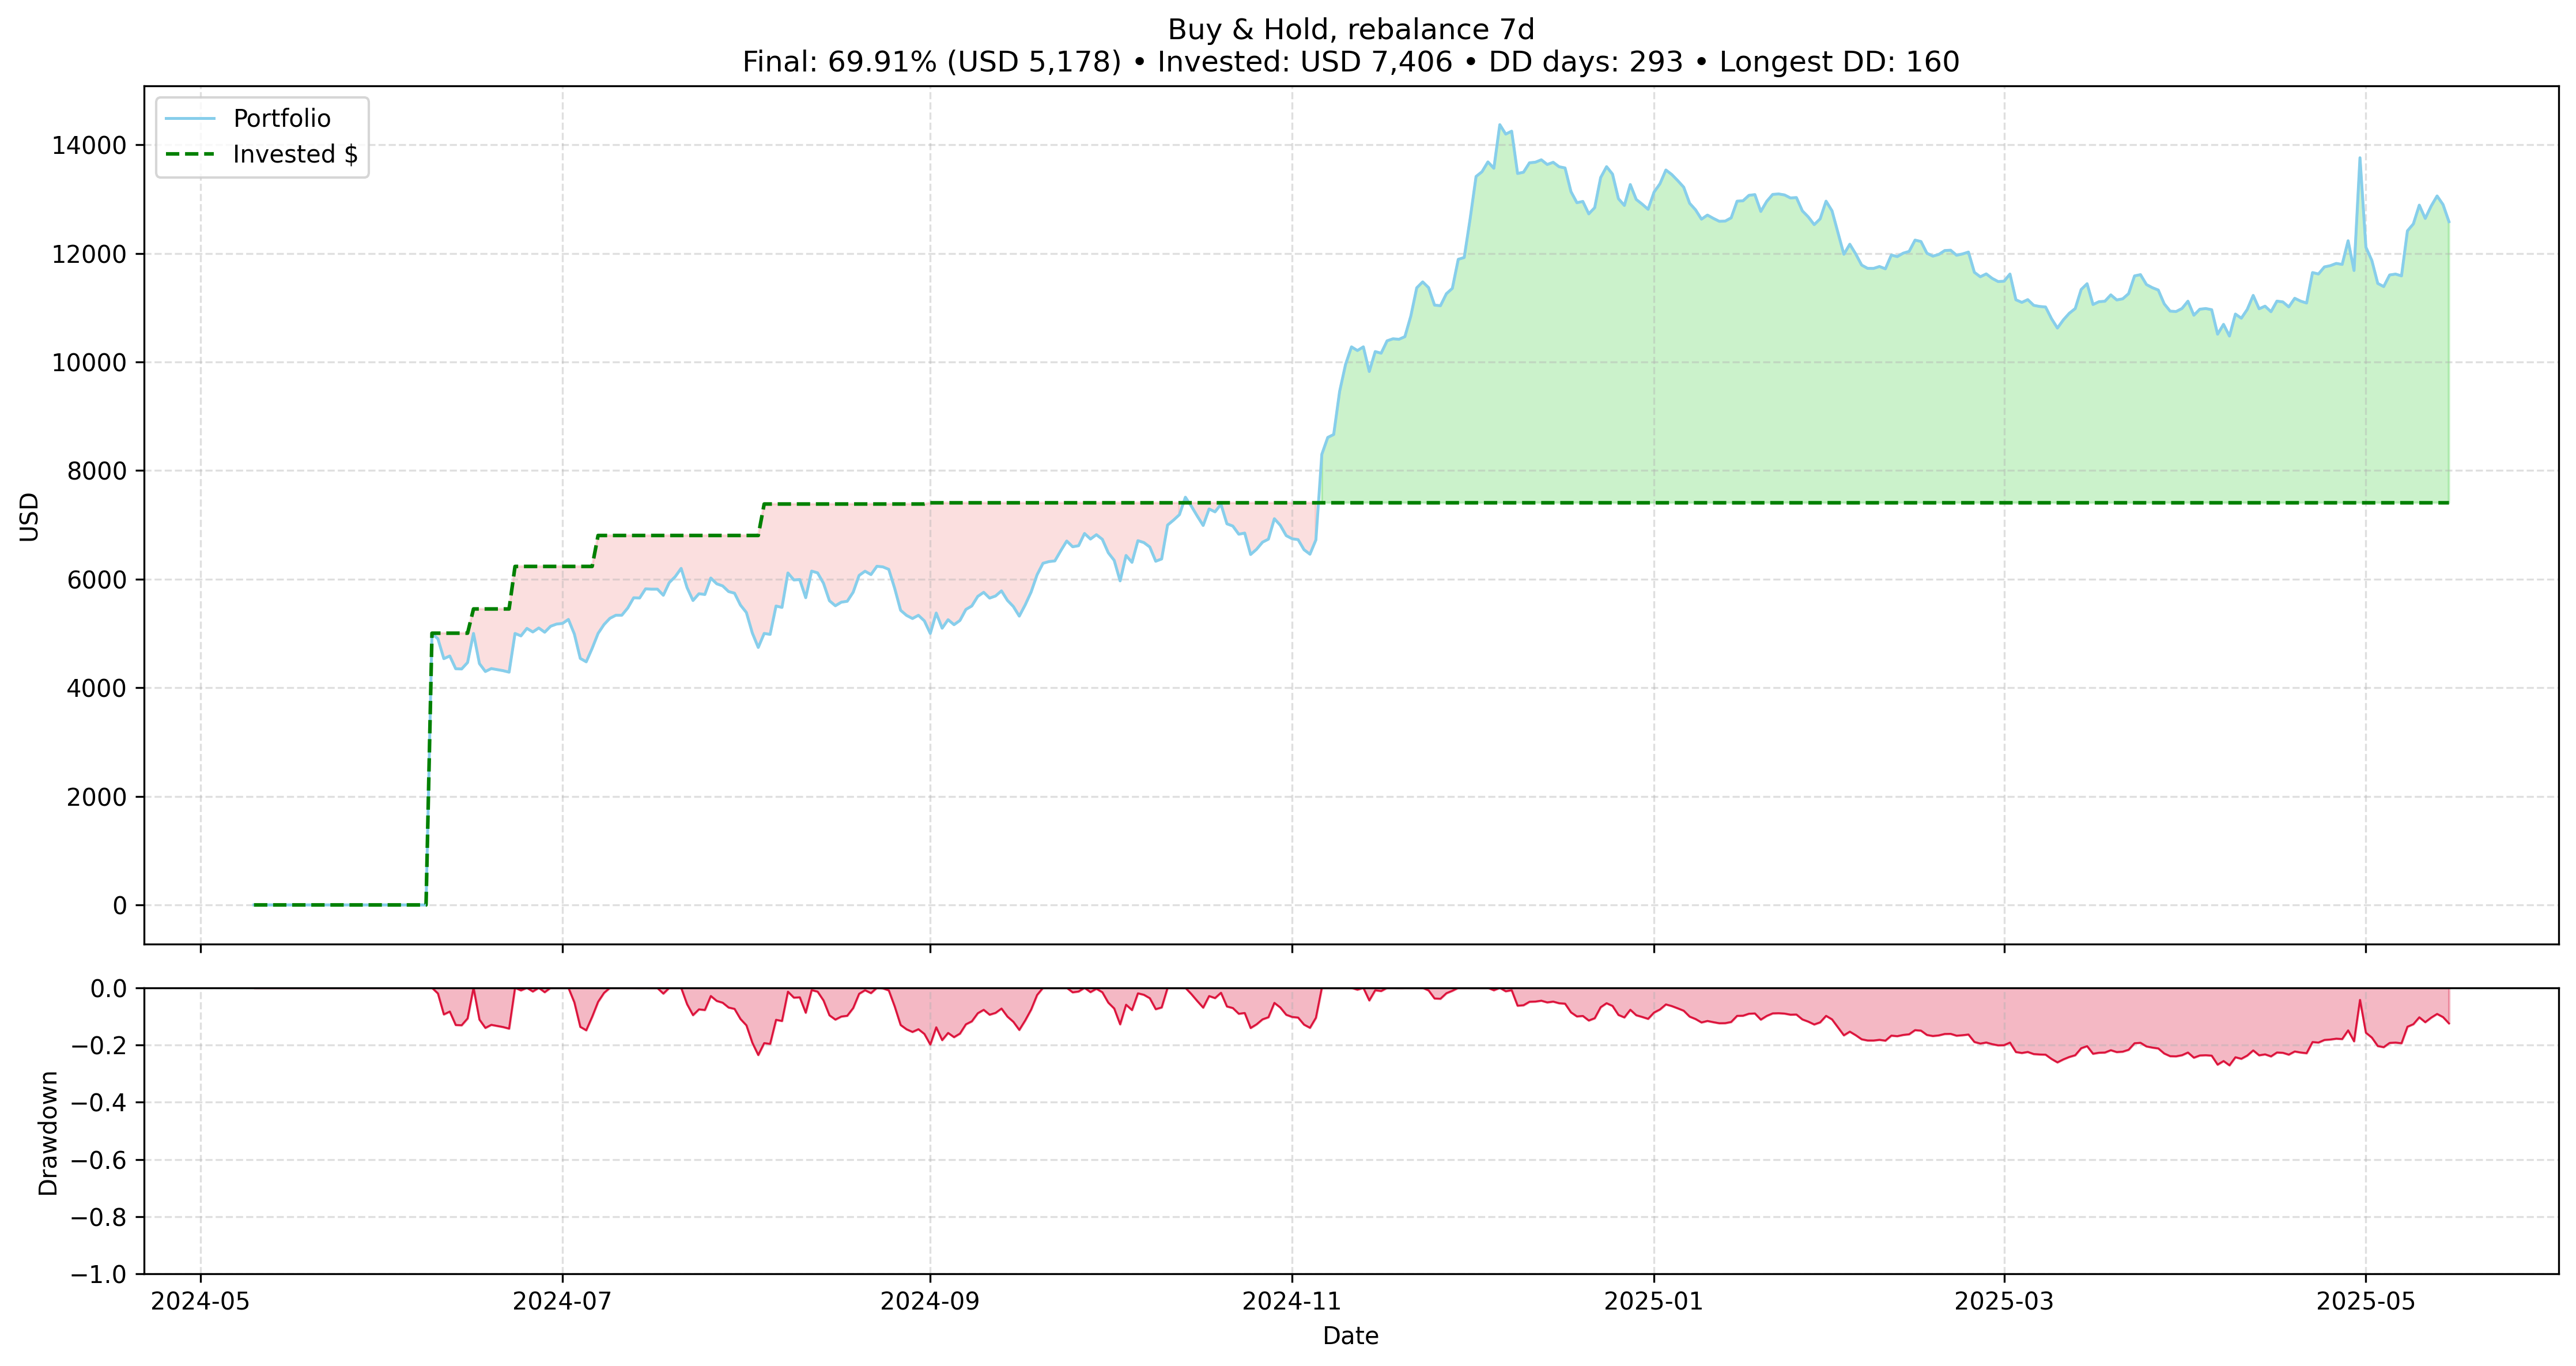

Final return      : 69.91% (USD 5,178)
Total invested    : USD 7,406
Time in drawdown  : 293 trading days
Longest DD period : 160 trading days

TOP gainers, USD
XRP/USDT     1,505.68
DOGE/USDT    1,397.98
CRV/USDT       920.23
RAY/USDT       775.68
SUI/USDT       762.19
dtype: object

TOP losers, USD
PEOPLE/USDT      -695.00
1000SATS/USDT    -425.55
SOL/USDT         -396.25
AMP/USDT         -392.60
FLOKI/USDT       -259.80
dtype: object

Traded volume, USD: 230,292.62


In [3]:
strategy = TopNEqualDollarStrategy(n_top=5, usd_per_strat=1_000)
rb = Rebalancer(data, strategy, lookback_days=30, rebalance_freq_days=7, fee_rate=0.001)
result = rb.run()    
Rebalancer.plot_equity(result.equity_curve, result.invested_curve,"Buy & Hold, rebalance 7d")
Rebalancer.report_top_movers(result.total_pnl, result.traded_volume)

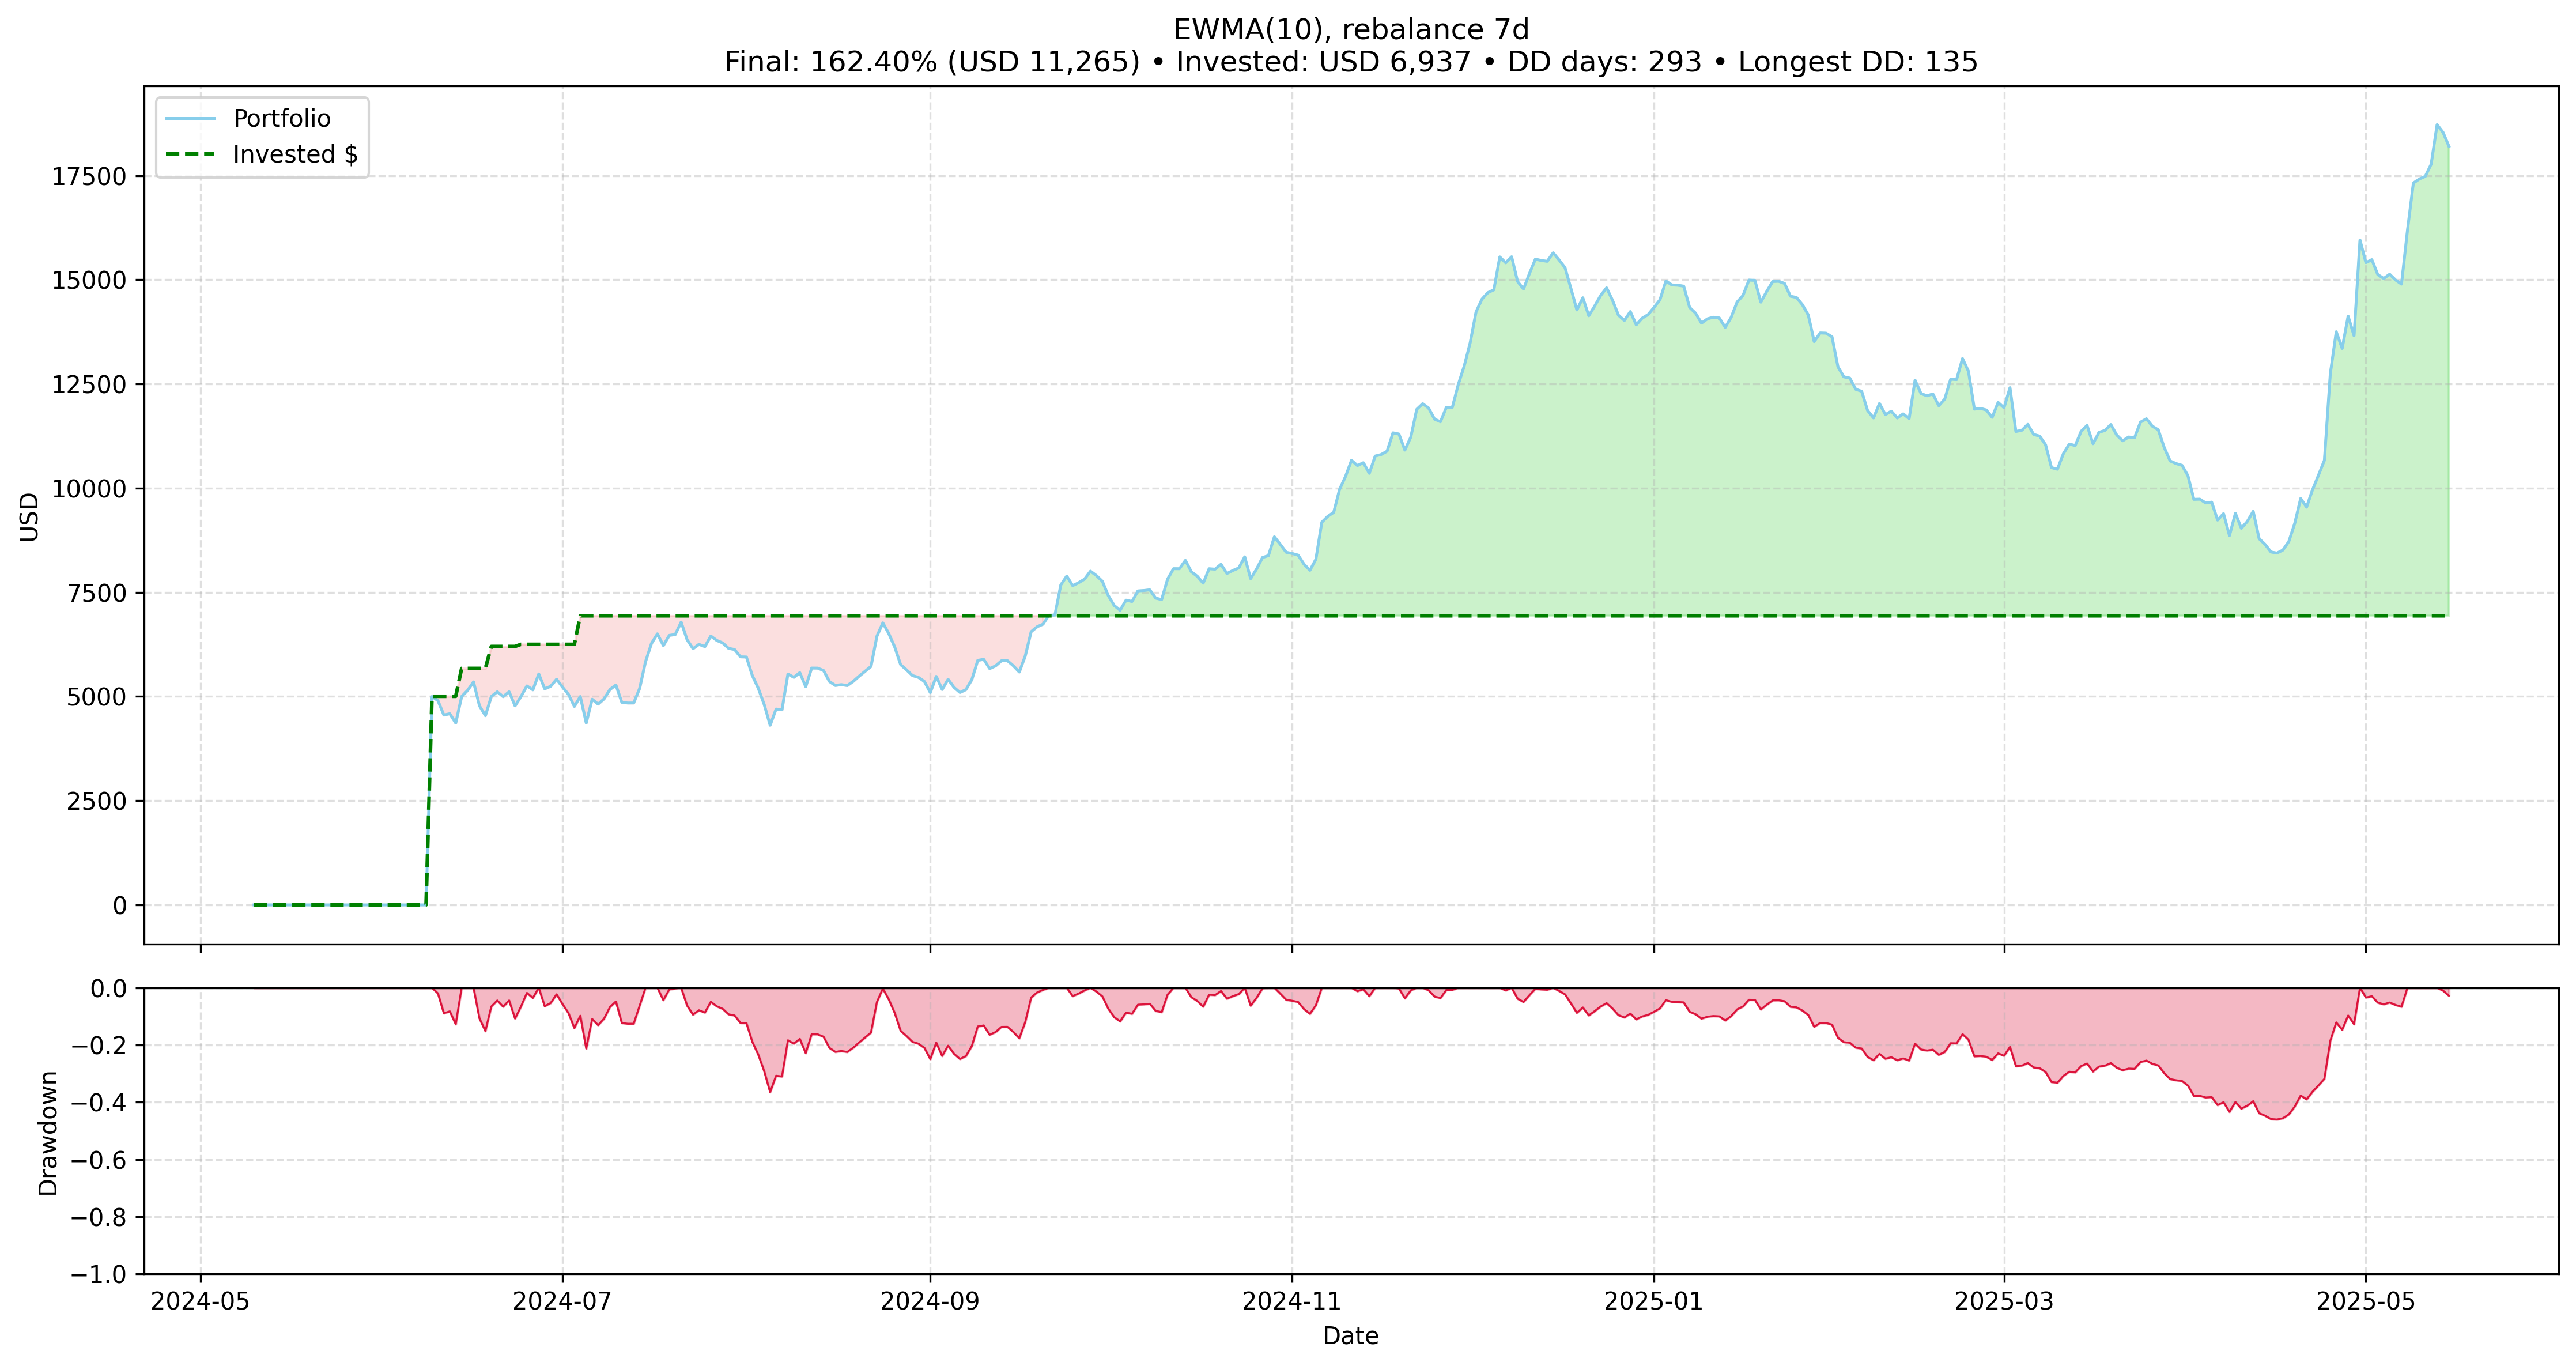

Final return      : 162.40% (USD 11,265)
Total invested    : USD 6,937
Time in drawdown  : 293 trading days
Longest DD period : 135 trading days

TOP gainers, USD
ALPACA/USDT    4,163.31
HBAR/USDT      1,579.84
CRV/USDT       1,362.03
TAO/USDT       1,064.26
XRP/USDT         995.27
dtype: object

TOP losers, USD
BOME/USDT        -646.56
FLOKI/USDT       -635.65
1000SATS/USDT    -405.67
BONK/USDT        -337.56
SHIB/USDT        -314.45
dtype: object

Traded volume, USD: 443,871.92


In [4]:
strategy = DynamicEWMAStrategy(n_top=5, usd_per_strat=1_000, span=15)
rb = Rebalancer(data, strategy, lookback_days=30, rebalance_freq_days=5, fee_rate=0.001)

result = rb.run()    
Rebalancer.plot_equity(result.equity_curve, result.invested_curve,"EWMA(10), rebalance 7d")
Rebalancer.report_top_movers(result.total_pnl, result.traded_volume)